# Red Wine Quality Analysis And Statistical Modeling

Importing the neccessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
import itertools
import csv
from datetime import datetime
import statsmodels.api as sm
import math
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection

from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import kstest

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
os.getcwd()

'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M2S3'

## Data loading

In [3]:
df = pd.read_csv("/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M2S3/winequality-red.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


There are 1599 red wine records and 11 columns describing red wine.

## EAD

### Main statistics

In [4]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- The quality attribute is the categorical with the scale from 3 to 8.
- Avg. red wine rating is 5.6, median 6.
- Other wine attributes varies and they seem has different scale of values.

### What is unique quality ratings?

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

### How many wine records are per quality category?

In [6]:
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [7]:
wine_qual = df.groupby(['quality']).agg(Occur=('density','count')).reset_index()
wine_qual['Percent'] = round(wine_qual.Occur/ wine_qual.Occur.sum()*100,1)
wine_qual

,quality,Occur,Percent
0,3,10,0.6
1,4,53,3.3
2,5,681,42.6
3,6,638,39.9
4,7,199,12.4
5,8,18,1.1


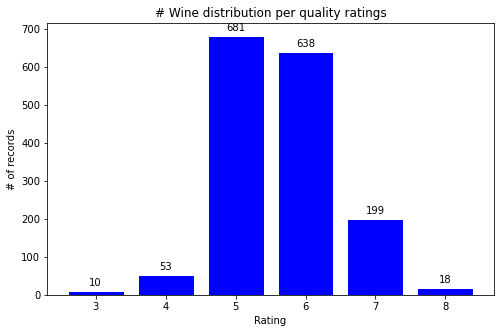

In [8]:
fig, ax = plt.subplots(figsize = (8,5))
wine_quality = plt.bar(wine_qual.quality, wine_qual.Occur, 
                       color='blue', edgecolor='white')

plt.xlabel('Rating')
plt.ylabel('# of records')
plt.title('# Wine distribution per quality ratings')

def autolabel(graph):
    for i in graph:
        height = i.get_height()
        ax.annotate('{:0,.0f}'.format(height),
            xy = (i.get_x() + i.get_width() / 2, height),
            xytext = (0, 3),
            textcoords = "offset points",
            ha = 'center', va = 'bottom')

autolabel(wine_quality)

plt.show()

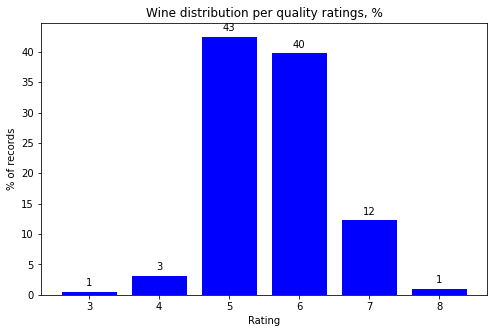

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
wine_qual_prop = plt.bar(wine_qual.quality, wine_qual.Percent, 
                       color='blue', edgecolor='white')

plt.xlabel('Rating')
plt.ylabel('% of records')
plt.title('Wine distribution per quality ratings, %')

def autolabel(graph):
    for i in graph:
        height = i.get_height()
        ax.annotate('{:0,.0f}'.format(height),
            xy = (i.get_x() + i.get_width() / 2, height),
            xytext = (0, 3),
            textcoords = "offset points",
            ha = 'center', va = 'bottom')

autolabel(wine_qual_prop)

plt.show()

- The majority of wines gets 5 (43%) and 6 (40%) quality ratings.
- Very few gets 7+ quality rating (13%)

### Good vs. bad quality wines

Lets's assume that wine which got 7 or more rating value is called "good" wine and the lower rating having wines are "bad".

In [10]:
df['QualityLabel'] = np.where(df.quality >= 7, 'Good', 'Bad')
df['QualityCategory'] = np.where(df.quality >= 7, 1, 0)

In [11]:
quality_category = df.groupby('QualityLabel').agg(Occur=('density','count')).reset_index()
quality_category['Percent'] = round(quality_category.Occur/ quality_category.Occur.sum()*100,1)
quality_category

,QualityLabel,Occur,Percent
0,Bad,1382,86.4
1,Good,217,13.6


Only 13.6% of wines in datset has good wine quality status.

### Attributes normalization

We will use log transformation with PowerTransformer to normalize data

1. First collect column names and prepare new columns names

In [12]:
d_col = list(df.columns)
d_col_new = [x.replace(" ", "_") + "_n" for x in d_col[0:11]]
d_col_new

['fixed_acidity_n',
 'volatile_acidity_n',
 'citric_acid_n',
 'residual_sugar_n',
 'chlorides_n',
 'free_sulfur_dioxide_n',
 'total_sulfur_dioxide_n',
 'density_n',
 'pH_n',
 'sulphates_n',
 'alcohol_n']

2. Normalize the data

In [13]:
pt = PowerTransformer()

df[d_col_new] = pd.DataFrame(
    pt.fit_transform(df[d_col[0:11]]), columns=[d_col[0:11]]
)
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile_acidity_n,citric_acid_n,residual_sugar_n,chlorides_n,free_sulfur_dioxide_n,total_sulfur_dioxide_n,density_n,pH_n,sulphates_n,alcohol_n
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860


### Attributes distributions

<b>Acidicy attributes distributions:</b>

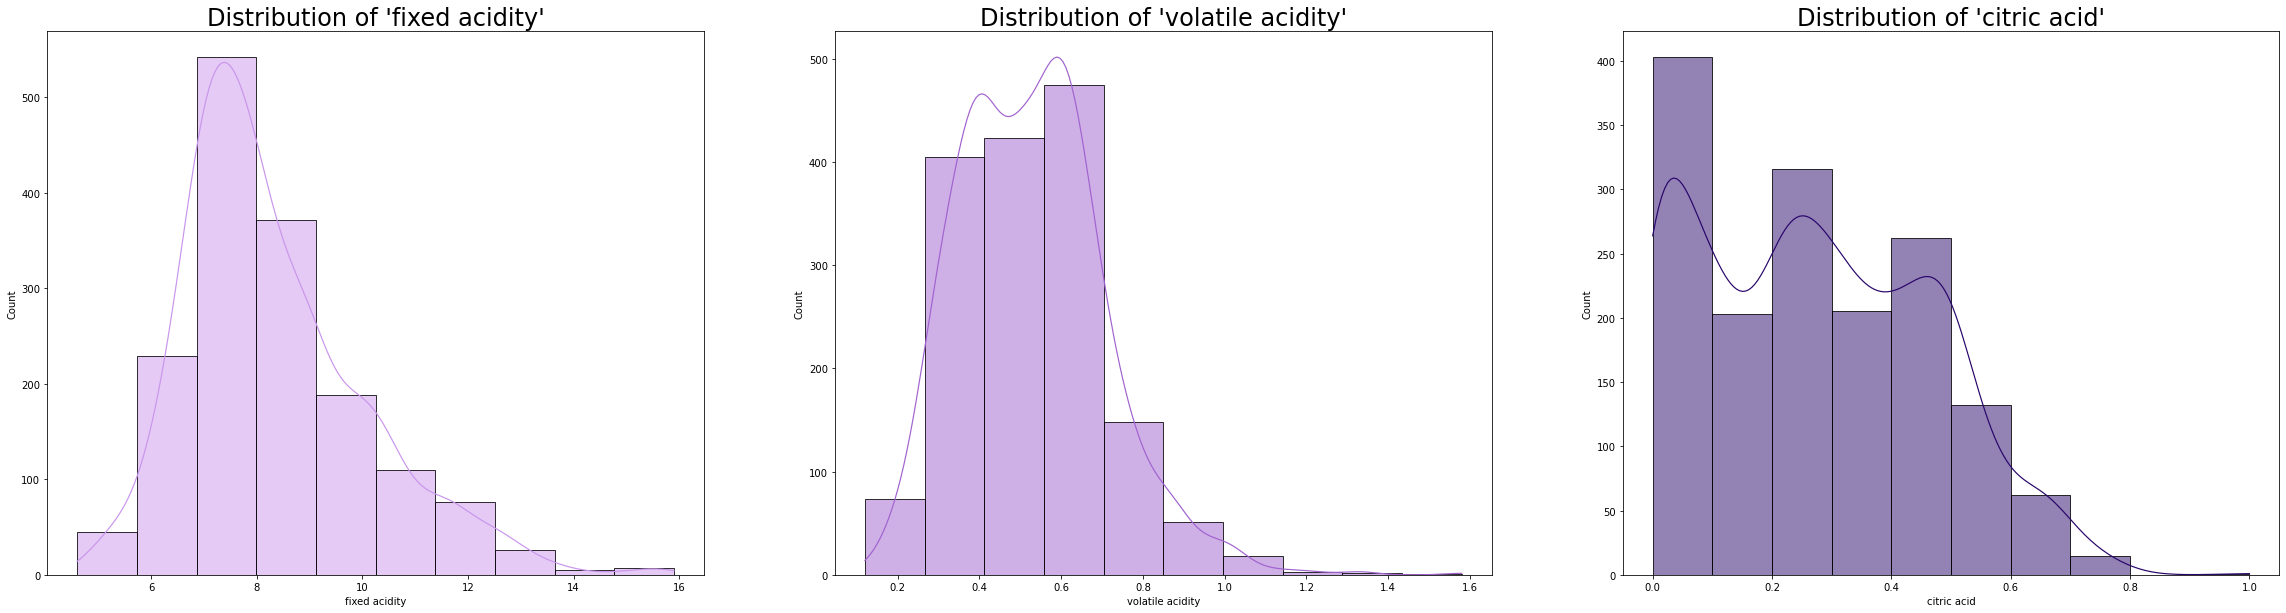

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.set_context("paper", font_scale=2.5) 

sns.histplot(ax = axes[0], x = df["fixed acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed acidity'");

sns.histplot(ax = axes[1], x = df["volatile acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile acidity'");

sns.histplot(ax = axes[2], x = df["citric acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric acid'");

- Fixed accidity variable values are close to normal distribution, but a bit left skewed. 
- Volatile acidity and citric acid have two and three peaks in the distributions.

<b>Residual sugar, chlorides, sulphates:</b>

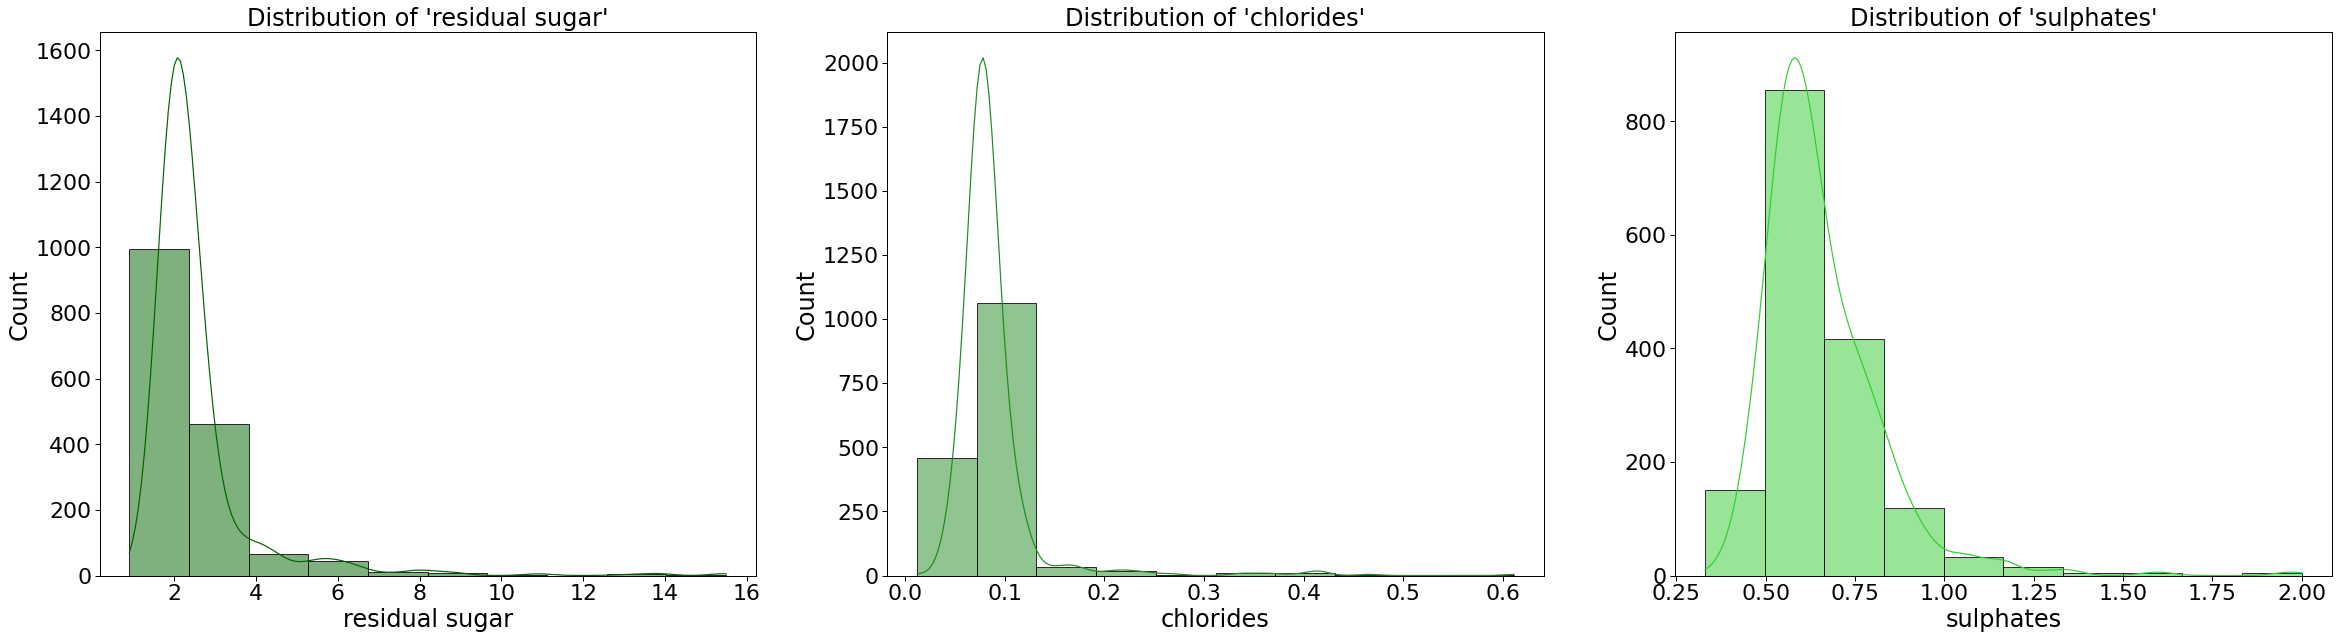

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["residual sugar"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#006400").set(title = "Distribution of 'residual sugar'");

sns.histplot(ax = axes[1], x = df["chlorides"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#228B22").set(title = "Distribution of 'chlorides'");

sns.histplot(ax = axes[2], x = df["sulphates"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#32CD32").set(title = "Distribution of 'sulphates'");

None of these variables are normal distributions

<b>free sulfur dioxide,  total sulfur dioxide, density:</b>

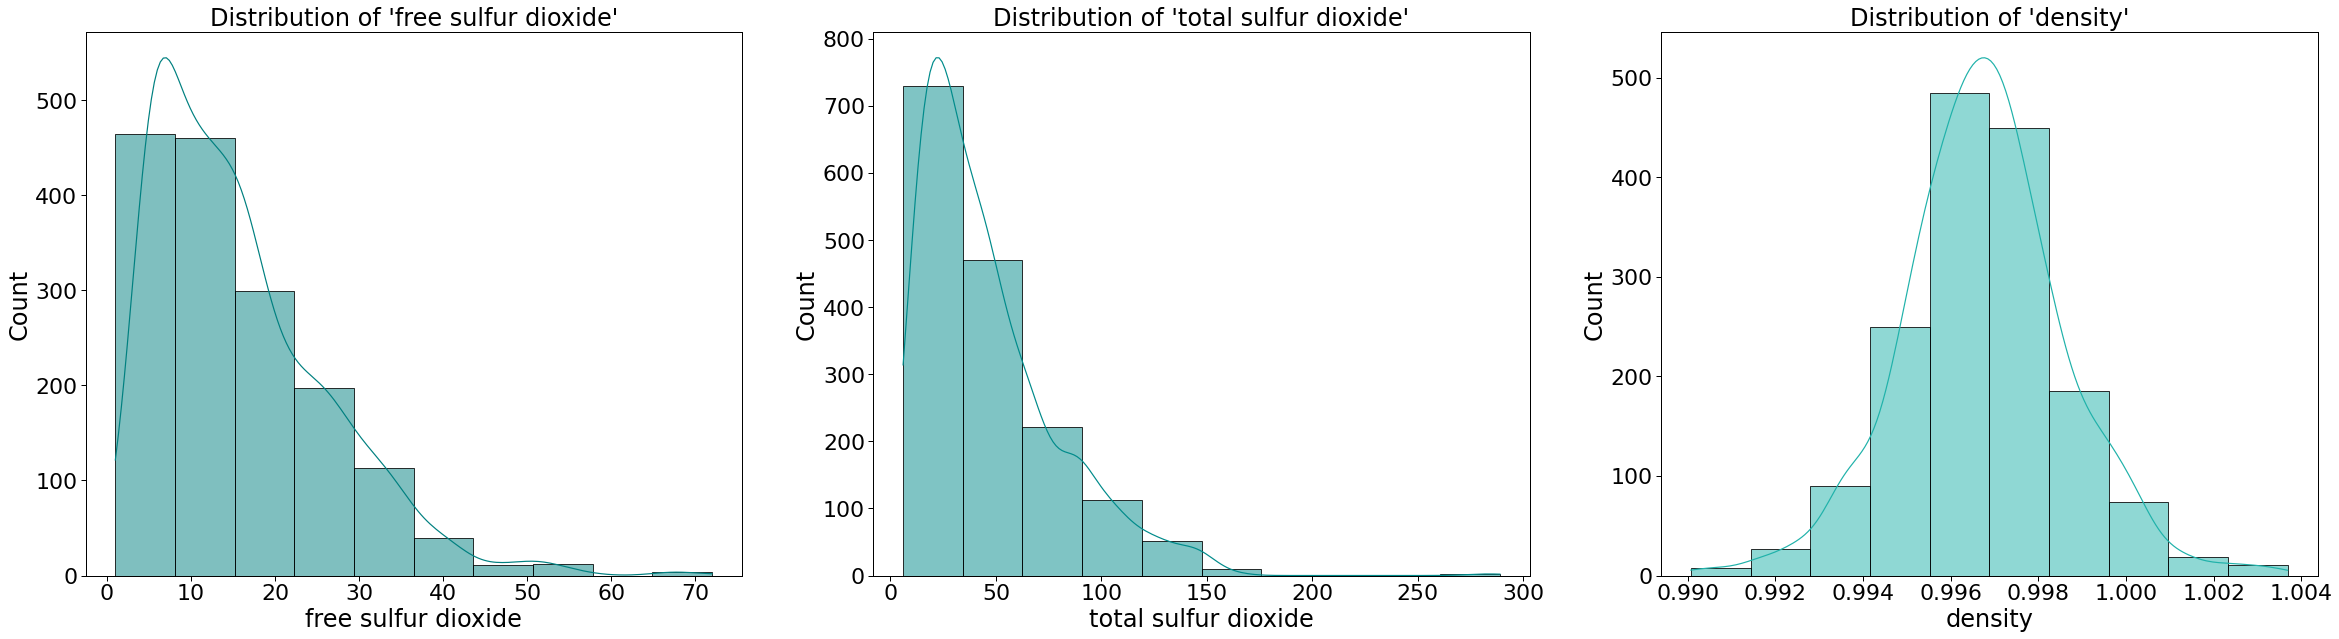

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["free sulfur dioxide"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#008080").set(title = "Distribution of 'free sulfur dioxide'");

sns.histplot(ax = axes[1], x = df["total sulfur dioxide"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#008B8B").set(title = "Distribution of 'total sulfur dioxide'");

sns.histplot(ax = axes[2], x = df["density"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#20B2AA").set(title = "Distribution of 'density'");

Only desity attribute values are normaly dsitributed. The rest are not normal distributions

<b>pH,  alcohol, quality:</b>

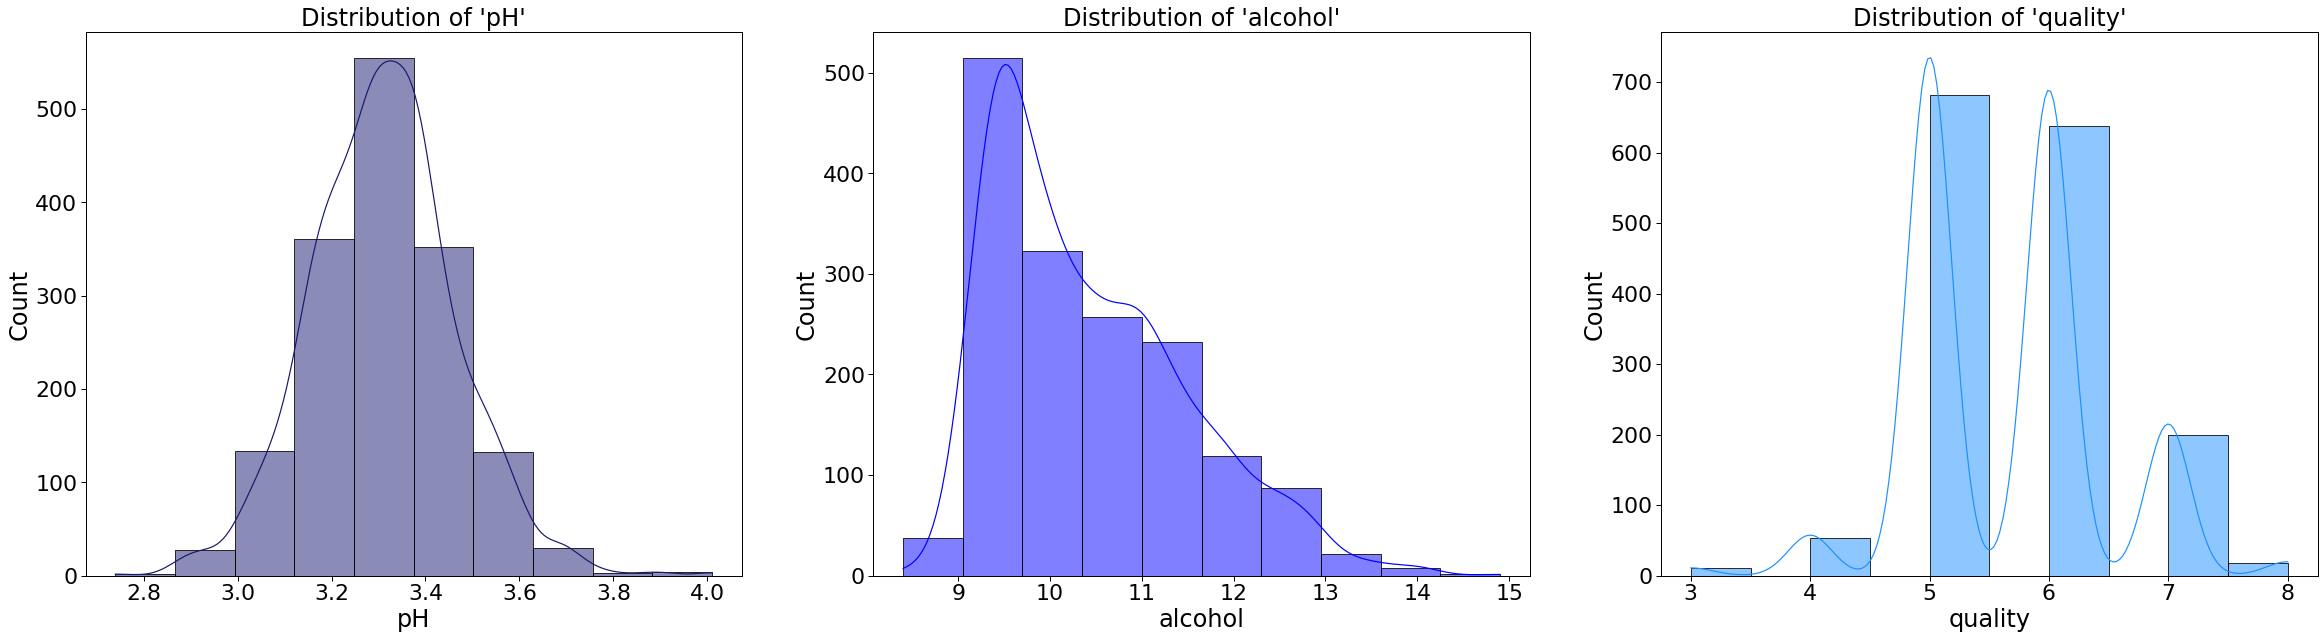

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(40, 10))

sns.histplot(ax = axes[0], x = df["pH"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#191970").set(title = "Distribution of 'pH'");

sns.histplot(ax = axes[1], x = df["alcohol"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#0000FF").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[2], x = df["quality"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#1E90FF").set(title = "Distribution of 'quality'");

pH attribute values are normaly distributed.
The rest are not normal distributions

### Checking for outliers

We will plot boxplots for the outliers detection:

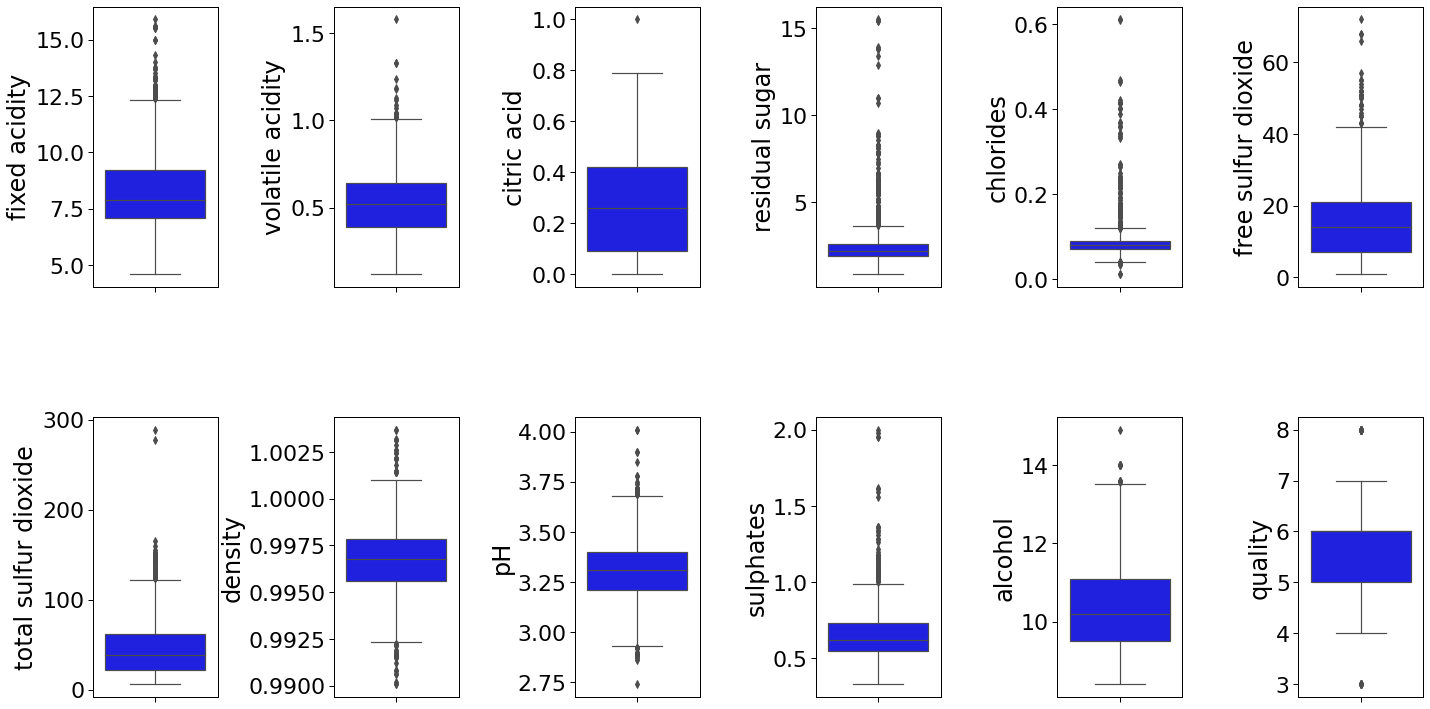

In [18]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

sns.set_context("paper", font_scale=2.5) 

for col, value in df[d_col[0:12]].items():
    sns.boxplot(y=col, data=df[d_col[0:12]], color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We can see that all variables has outliers.

### Correlations

<AxesSubplot:>

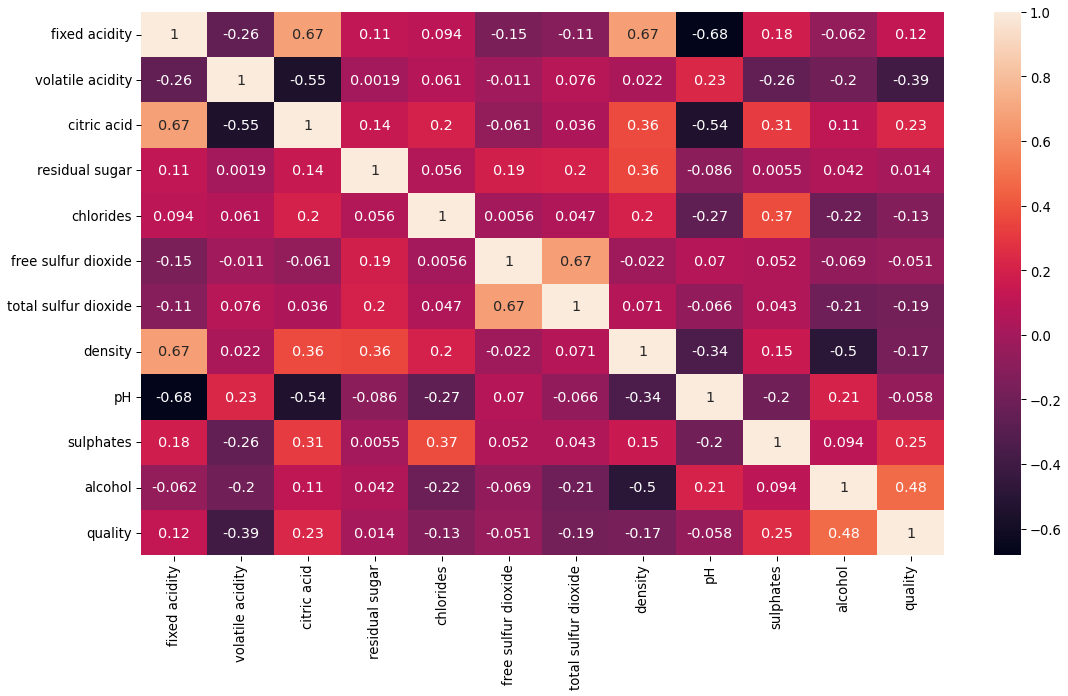

In [19]:
plt.figure(figsize = (18,10))

sns.set_context("paper", font_scale=1.5) 

sns.heatmap(df[d_col[0:12]].corr(), annot=True)

There are few variables which correlations are reasonalby high:
- Fixed acidity vs. citric acid (corr = 0.67), w=density (0.67), negative correlation with pH (-0.68)
- Medium correlation is between  and  volatile acidity  (-0.55) and ph (-0.54)
- Alcohol most correlates with density (-0.5 - medium negative correlation, presenting negative linear relationship) and and with quality feature (0.48). There features could be meningful to inclide in linear regresiom model.

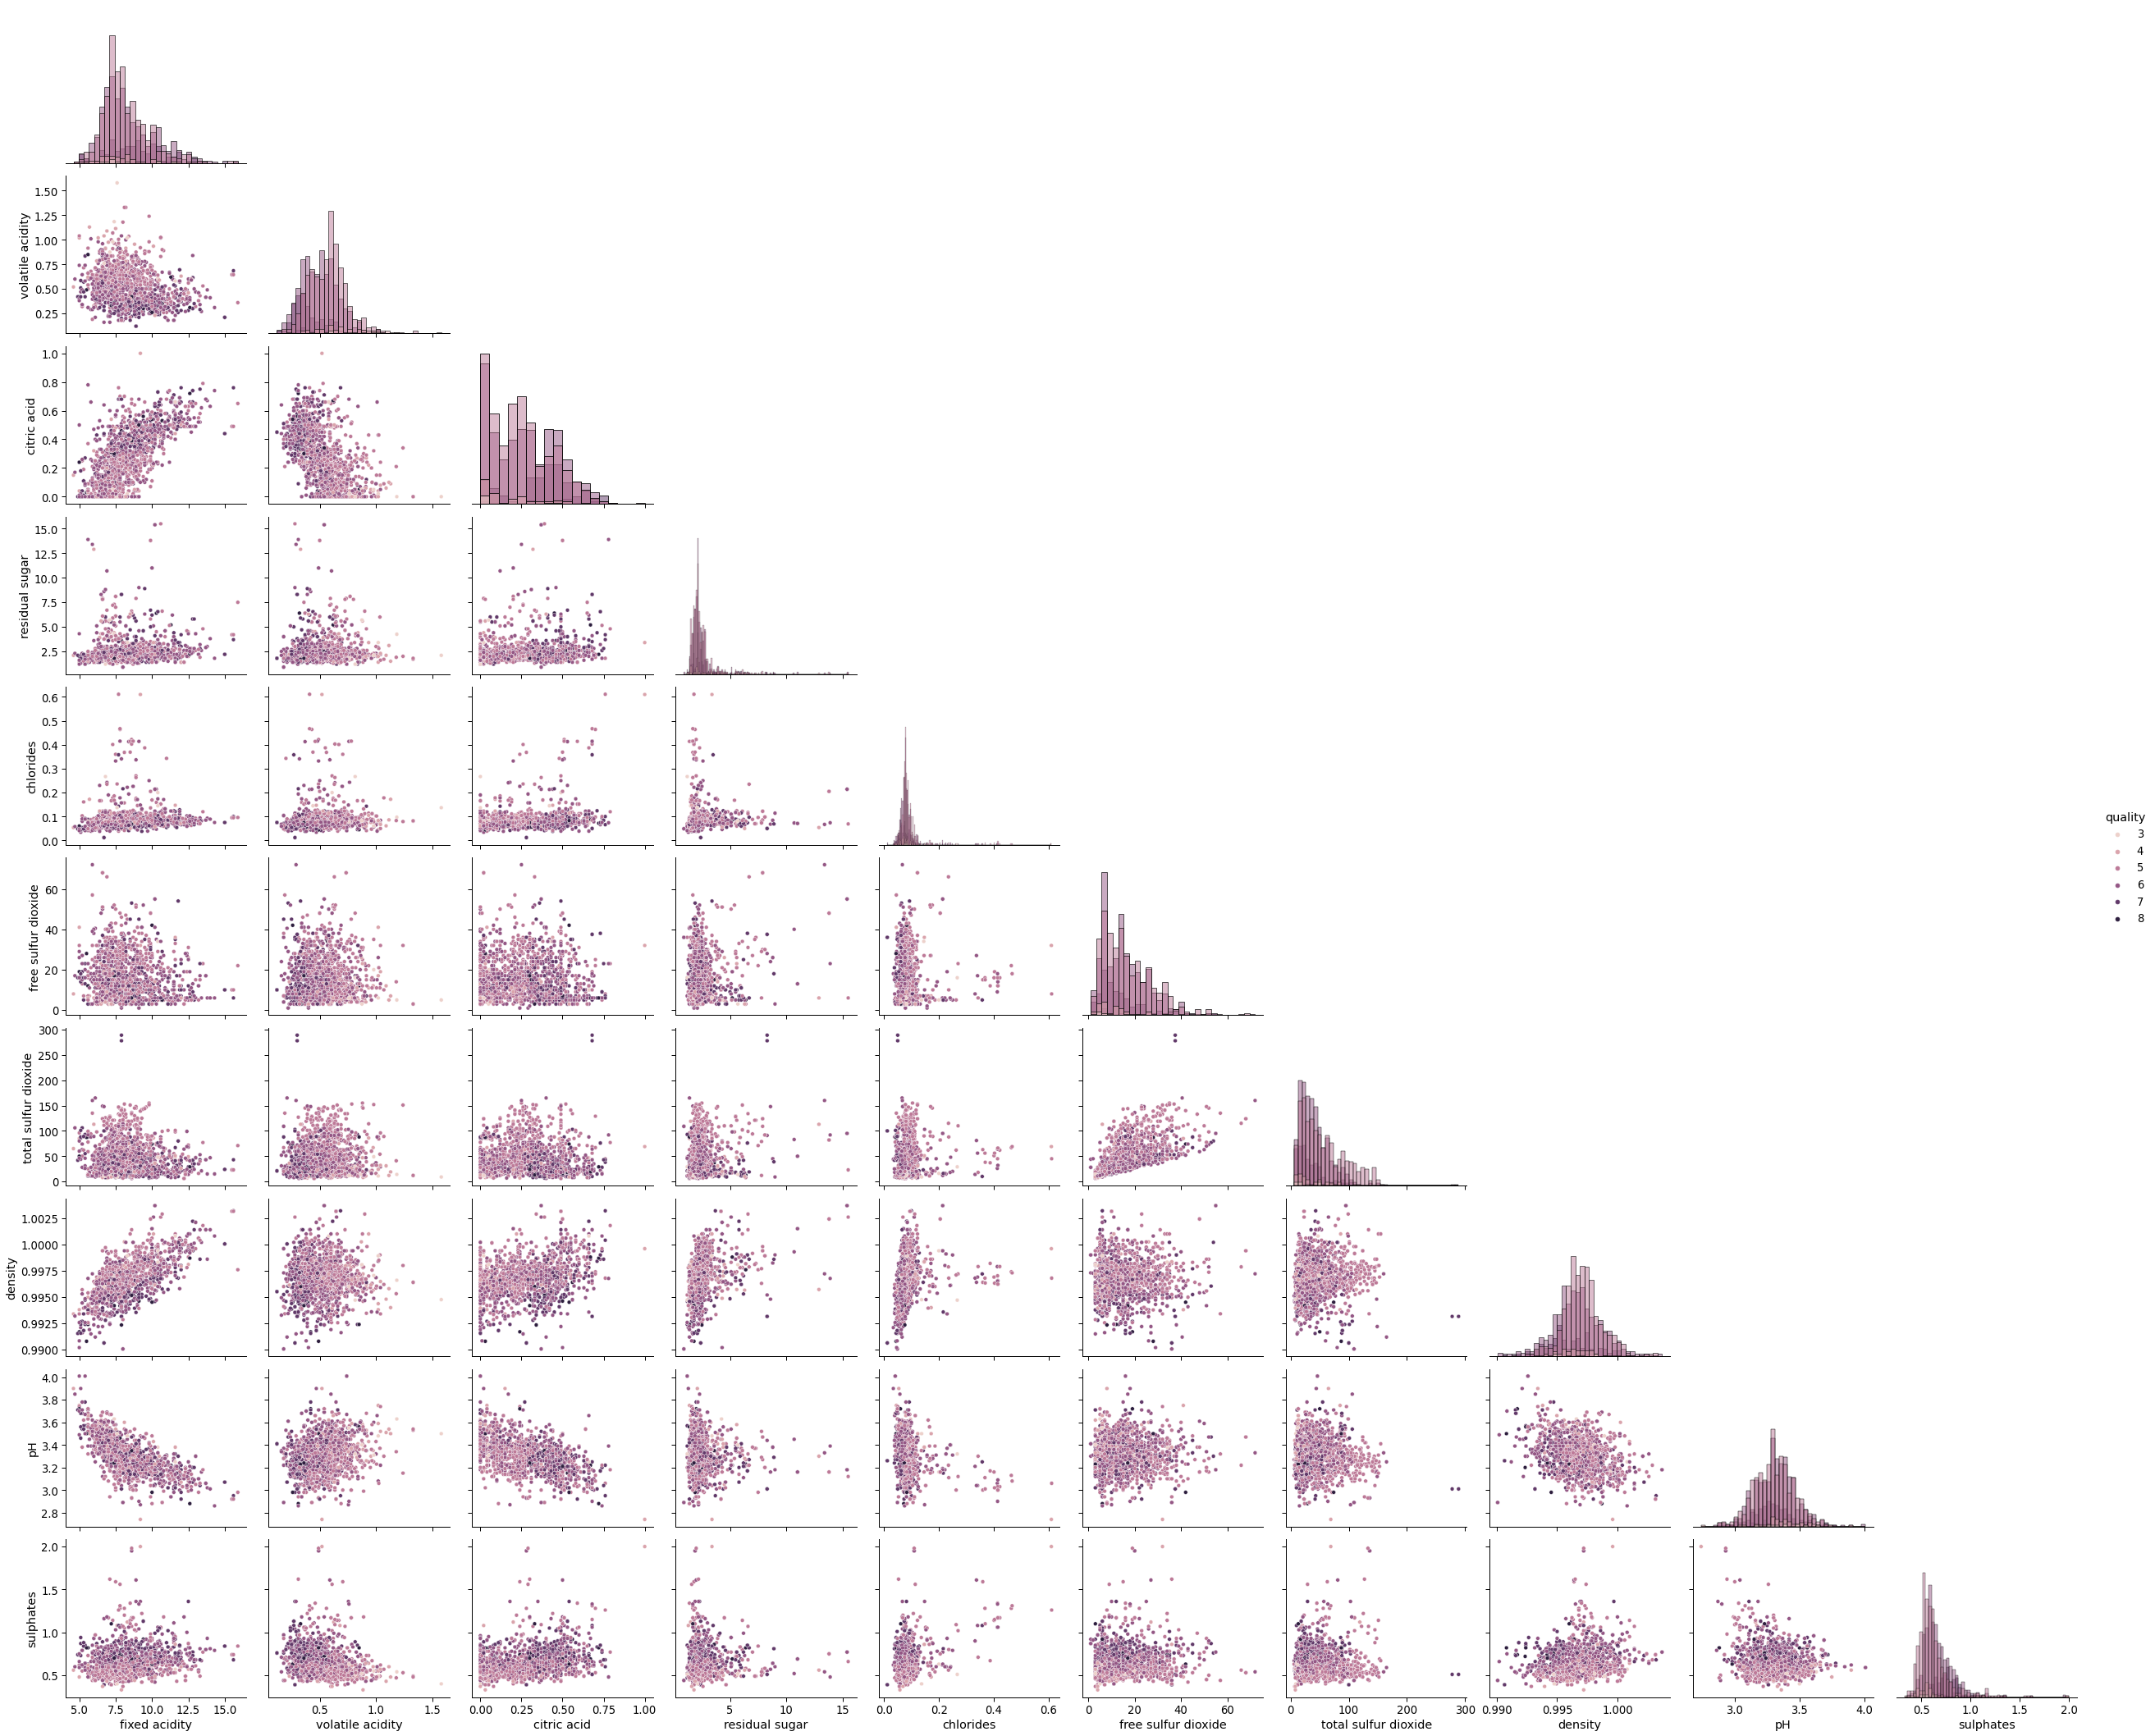

In [20]:
sns.pairplot(df[['fixed acidity', 'volatile acidity', 
       'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 
       'total sulfur dioxide', 'density',
       'pH', 'sulphates','quality']], 
     diag_kind = "hist", hue = "quality", 
     height = 3, aspect = 1.2, corner = True);

## Linear regresion modeling for wine alcohol level

### Iter 1 - 11 features
Let's test linear regresion model with multiple (all 11) features. Without outliers elimination, before data normalisation

In [21]:
#define response variable
y = df['alcohol']

#define explanatory variable
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates','quality']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     323.0
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:55:30   Log-Likelihood:                -1430.5
No. Observations:                1599   AIC:                             2885.
Df Residuals:                    1587   BIC:                             2949.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  563.1753 

Model r-squared of 69.1% reveals that 69.1% of the variability observed in the target variable is explained by the regression model.

Adjusted r-squared of 68.9% shows 𝑅² corrected according to the number of input features.

All variables are significant except free sulfur dioxide, which p-value is 0.139 > 0.05. This variable should be removed.

However constant value and density estimated coeficients are wer high. Which raises concerns for model quality.

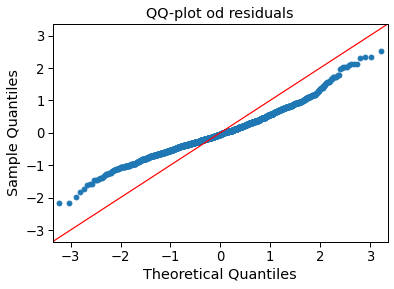

In [22]:
sm.qqplot(model.resid, line ='45')
plt.title('QQ-plot od residuals')
plt.show()

### Iter 2 - normalized feature values
Model with normalized feature values

In [23]:
#define response variable
y = df['alcohol']

#define explanatory variable
x = df[['fixed_acidity_n', 'volatile_acidity_n',
       'citric_acid_n', 'residual_sugar_n', 'chlorides_n',
       'free_sulfur_dioxide_n', 'total_sulfur_dioxide_n', 'density_n', 'pH_n',
       'sulphates_n','quality']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     306.0
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:55:32   Log-Likelihood:                -1460.1
No. Observations:                1599   AIC:                             2944.
Df Residuals:                    1587   BIC:                             3009.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

The model quality haven't changed that much, R^2 remained more than 60% (68%).

Feautures significance remained the same, free sulfur dioxide based on p-value is recomended to remove from the model.

Estimated coeficients now looks better.

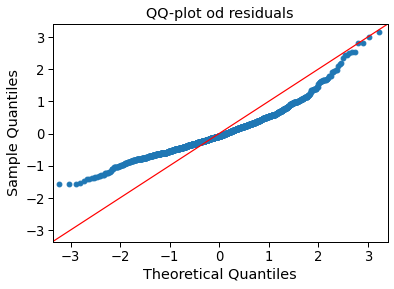

In [24]:
sm.qqplot(model.resid, line ='45')
plt.title('QQ-plot od residuals')
plt.show()

### Iter 3 - removing insignificant features
Removing insignificant features from the model: free_sulfur_dioxide_n

In [25]:
#define response variable
y = df['alcohol']

#define explanatory variable
x = df[['fixed_acidity_n', 'volatile_acidity_n',
       'citric_acid_n', 'residual_sugar_n', 'chlorides_n',
        'total_sulfur_dioxide_n', 'density_n', 'pH_n',
       'sulphates_n','quality']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     336.8
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        21:55:34   Log-Likelihood:                -1460.1
No. Observations:                1599   AIC:                             2942.
Df Residuals:                    1588   BIC:                             3001.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

The model quality haven't improved at all

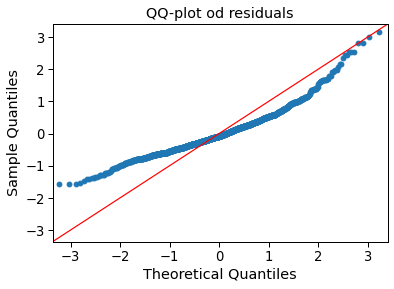

In [26]:
sm.qqplot(model.resid, line ='45')
plt.title('QQ-plot od residuals')
plt.show()

### Iter 4 - correlated features
Lets try model with only two correlated features: density, quality

In [49]:
#define response variable
y = df['alcohol']

#define explanatory variable
x = df[['density_n','quality']]

#add constant to predictor variables
# x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                alcohol   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          4.914e+04
Date:                Fri, 26 May 2023   Prob (F-statistic):                        0.00
Time:                        23:00:16   Log-Likelihood:                         -2718.7
No. Observations:                1599   AIC:                                      5441.
Df Residuals:                    1597   BIC:                                      5452.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Model with only highest correlation having features and without constant value is very good quality, R^2 = 0.984, which shows that independend variables describes 98.4% of dependand variable variability.

If density increase by 1% point, the alcohol level might decrease by -0.2730 points.
The higher wine quality rating, the probably higher alcohol level wine will be.

Text(0, 0.5, 'Residuals')

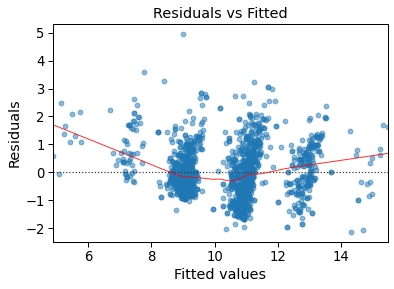

In [28]:
# fitted values
model_fitted_y = model.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='alcohol', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

#### Residuals normality testing

We will plot residuals distribution

/Users/kristinazekiene/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


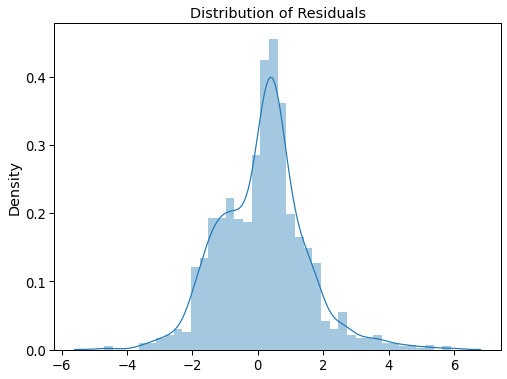

In [29]:
plt.subplots(figsize=(8, 6))
plt.title('Distribution of Residuals')
sns.distplot(model.resid)
plt.show()

It might look like normal or binomial distribition to sligly lew skewness

QQ-plot for residuals mormality check:

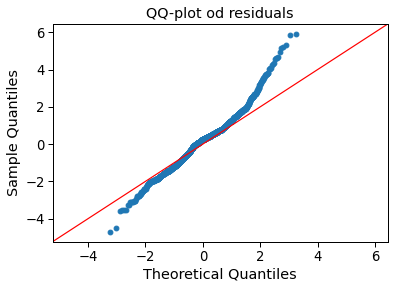

In [30]:
sm.qqplot(model.resid, line ='45')
plt.title('QQ-plot od residuals')
plt.show()

There is parts on the diagonal line, but endings are far from the line. This might indicate, that residuals might be not normaly distributed.

Shapiro-Wilk test for normality:

In [31]:
shapiro(model.resid)

ShapiroResult(statistic=0.9805130958557129, pvalue=6.413174434864374e-14)

Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
This means we have sufficient evidence to say that the model residuals does not come from a normal distribution.

Kolmogorov-Smirnov test:

In [32]:
kstest(model.resid, 'norm')

KstestResult(statistic=0.10350178947366184, pvalue=2.285298853940086e-15)

Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.
This means we have sufficient evidence to say that residuals does not come from a normal distribution.

## Logistic regresion for quality prediction

In this part we want to create model, which well describes and predicts wine quality (good vs. bad).
For this reason, we will apply Logistiv regresion model to predict good quality wine.

### Iter 1 - 11 features

In [33]:
y = df['QualityCategory']

#define explanatory variable
x = df[['alcohol_n','fixed_acidity_n', 'volatile_acidity_n',
       'citric_acid_n', 'residual_sugar_n', 'chlorides_n',
        'total_sulfur_dioxide_n', 'density_n', 'pH_n',
       'sulphates_n']]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 10)
(1279,)
(320, 10)
(320,)


In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [36]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[274  14]
 [ 23   9]]
88.4375


In [37]:
def accuracy(tp, fp, fn, tn):
    correct = tp + tn
    total = tp + fp + fn + tn
    return correct / total

def precision(tp, fp, fn, tn):
    return tp / (tp + fp)

def recall(tp, fp, fn, tn):
    return tp / (tp + fn)

def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

In [38]:
tp = lr_conf_matrix[0][0]
fp = lr_conf_matrix[0][1]
fn = lr_conf_matrix[1][0]
tn = lr_conf_matrix[1][1]

In [39]:
print('Accuracy:',accuracy(tp, fp, fn, tn))
print('Precision:',precision(tp, fp, fn, tn))
print('Recal:',recall(tp, fp, fn, tn))
print('F1 score:', f1_score(tp, fp, fn, tn))

Accuracy: 0.884375
Precision: 0.9513888888888888
Recal: 0.9225589225589226
F1 score: 0.9367521367521368


The model with all features is good quality. (ACC = 88.4%, F1 = 93.6%)
This means, that model 88.4% of times predicts wine quality as god.

### Iter 2 - corelated features

In [40]:
y = df['QualityCategory']

#define explanatory variable
x = df[['alcohol_n', 'volatile_acidity_n', 'sulphates_n']]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

In [41]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [42]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[273  15]
 [ 23   9]]
88.125


In [43]:
tp = lr_conf_matrix[0][0]
fp = lr_conf_matrix[0][1]
fn = lr_conf_matrix[1][0]
tn = lr_conf_matrix[1][1]

In [44]:
print('Accuracy:',accuracy(tp, fp, fn, tn))
print('Precision:',precision(tp, fp, fn, tn))
print('Recal:',recall(tp, fp, fn, tn))
print('F1 score:', f1_score(tp, fp, fn, tn))

Accuracy: 0.88125
Precision: 0.9479166666666666
Recal: 0.9222972972972973
F1 score: 0.9349315068493149


Reducing features amount does not negatively effected the model and its quality.
The model quality remained good. (ACC = 88.1%, F1 = 93.4%) This means, that model 88.1% of times predicts wine quality as god.

## Additonal

We will calculate Cook distance

In [45]:
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([3.78036725e-05, 6.60918968e-05, 7.39281298e-05, ...,
       1.77871994e-06, 1.71772487e-04, 4.02878646e-06]), array([0.9999622 , 0.99993391, 0.99992607, ..., 0.99999822, 0.99982824,
       0.99999597]))


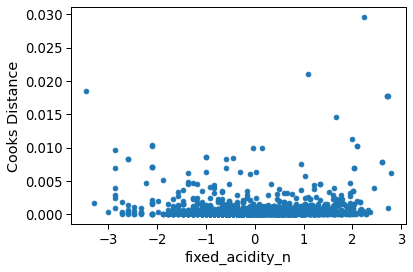

In [46]:
plt.scatter(df.fixed_acidity_n, cooks[0])
plt.xlabel('fixed_acidity_n')
plt.ylabel('Cooks Distance')
plt.show()

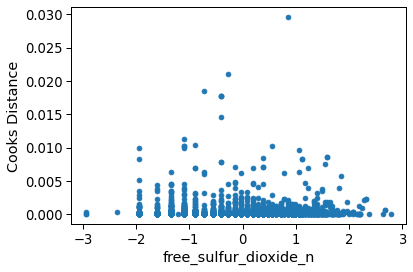

In [47]:
plt.scatter(df.free_sulfur_dioxide_n, cooks[0])
plt.xlabel('free_sulfur_dioxide_n')
plt.ylabel('Cooks Distance')
plt.show()